In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

from scipy import stats

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as po

df = pd.read_csv('parts_sellers.csv')
df = df[df.year_sales > 0]
df.year_sales = pd.to_numeric(df.year_sales, errors='coerce')
df = df.sort_values(by=['year_sales'], ascending=False)
sum_fvf = df.year_fvf.sum()
df['percent_fvf'] = [x / sum_fvf for x in df.year_fvf]
df.percent_fvf = pd.Series(["{0:.1f}%".format(val * 100) for val in df.percent_fvf], index = df.index)
df.inventory_source_em = df.inventory_source_em.fillna('None')

In [2]:
#Create a new dataframe for each value_em type
whale = df[df.value_em == 'whale']
minnow = df[df.value_em == 'minnow']
sea_bass = df[df.value_em == 'sea_bass']
dolphin = df[df.value_em == 'dolphin']
value_em = [whale, dolphin, sea_bass, minnow]
names = ['Whale', 'Dolphin', 'Sea_bass', 'Minnow']



In [173]:
df['fvf_percent']=[fee / df.year_fvf.sum() for fee in df.year_fvf]

data = df.groupby(['inventory_source_em']).sum()['year_sales']
labels = (data.index)
mpl.rcParams['font.size'] = 13.0
explode = (0,0,0,0,.1)
colors = ['#247ba0','#70c1b3','#b2dbbf','#f3ffbd','#ff1654']
font_dict = {'family':'serif',
                'color':'darkred',
                'size':15}



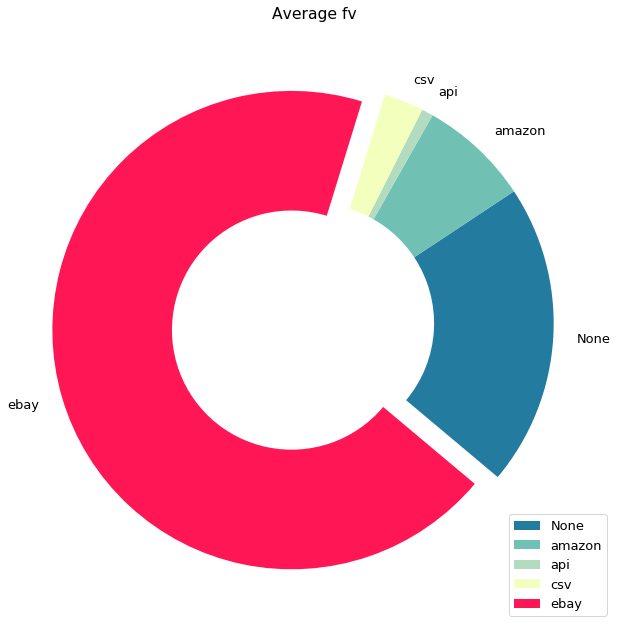

In [174]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_df_sum.index,
        z = state_df_sum.profit_estimate.astype(float),
        locationmode = 'USA-states',
        text = state_df_count.seller_id,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Profit Estimate")
        ) ]

layout = dict(
        title = 'Profit Estimate Per State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
po.plot( fig, filename='d3-cloropleth-map.html' )

In [49]:
labels = ['bing', 'direct','email', 'google_text_ad', 'organic']
values = [minnow.seller_id, sea_bass.seller_id, dolphin.seller_id, whale.seller_id]
colors = ['#19005c', '#810060','#c80050','#f35a33','#ffa600']
x_values = [[0, .48], [.52, 1], [0, .48], [.52, 1]]
y_values = [[0, .49], [0, .49], [.51, 1], [.51, 1]]
names = ['minnow', 'sea_bass', 'dolphin', 'whale']

In [66]:
data = []

for value, label, x, y , name in zip(values, labels, x_values, y_values, names):
        data.append({'labels':labels,
            'values': value,
            'domain' : {'x': x,
                       'y': y},
            'type': 'pie',
            'marker': {'colors': colors},
            "hoverinfo":"label+percent+value",
            "title": name,
            'titlefont' : dict(size=24),
            'textfont': dict(color='#FFFFFF'),
                
 
            },)
            

In [67]:
layout = {
    'title':'Value_em by Source',
    'titlefont' : dict(size=32),
    'legend' : dict(x=.45, y=.5, font = dict(size = 20)),
}

In [68]:
fig = { 'data': data, 'layout': layout }
po.plot(fig, filename='pie_chart.html')

'file:///Users/kevin/data_analysis/pie_chart.html'